# Pandas: Complete Tutorial (Beginner → Advanced)
**Goal:** By the end you'll be able to use pandas for real-world data analysis and prepare features for ML/DL workflows.

Contents:
1. Setup & intro
2. Core data structures (Series, DataFrame)
3. I/O (CSV, Excel, JSON, SQL)
4. Indexing, selection, boolean indexing
5. Missing data, datatypes, and conversions
6. Grouping, aggregation, pivoting, reshaping
7. Merges, joins, concat
8. Time series & datetime
9. Window & rolling operations
10. Text, categorical, and advanced dtypes
11. Performance: vectorization, memory, chunking, Dask
12. Feature engineering & ML preparation
13. Working with large datasets, tips & debugging
14. Useful utilities & final checklist


In [2]:
# Install (run in terminal or notebook cell with !)
# !pip install pandas numpy matplotlib seaborn scikit-learn openpyxl sqlalchemy pyarrow

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 200)

print("Numpy Version: ",np.__version__)
print("Pandas Version: ",pd.__version__)
print("Matplotlib Version: ",matplotlib.__version__)
print("Seaborn Version: ",sns.__version__)

Numpy Version:  2.0.2
Pandas Version:  2.3.3
Matplotlib Version:  3.9.4
Seaborn Version:  0.13.2


## Why pandas?
- Fast, flexible tabular data manipulation.
- Built on NumPy — vectorized ops.
- Essential for data cleaning, EDA, feature engineering before ML/DL.


## Core data structures
- `Series`: 1D labeled array.
- `DataFrame`: 2D table (rows, columns) of potentially mixed dtypes.


In [4]:
# Series
s = pd.Series([10, 20, 30], index=["a","b","c"], name="my_series")
print(s)
print(type(s))
print("Access by index:", s["b"])
print("Numpy ops:", s.mean(), s + 5)


a    10
b    20
c    30
Name: my_series, dtype: int64
<class 'pandas.core.series.Series'>
Access by index: 20
Numpy ops: 20.0 a    15
b    25
c    35
Name: my_series, dtype: int64


# 📚 Pandas Series — Complete Tutorial (Beginner → Advanced)

In this section, we will learn everything about **Pandas Series**, including:

- What is a Series?
- Creating Series (multiple methods)
- Index operations
- Slicing & selection
- Vectorized operations
- Useful functions
- Handling missing values
- Type conversion
- Filtering + Boolean indexing
- Statistical methods
- Map, Apply, Replace
- Combining Series
- Sorting
- Plotting Series
- Advanced operations

Let's begin!


## Creating a Pandas Series
Pandas Series can be created from:
- Python list
- NumPy array
- Dictionary
- Scalar value
- Using `pd.Series()` with custom index


In [3]:
# From a list
s1 = pd.Series([10, 20, 30, 40])
s1


0    10
1    20
2    30
3    40
dtype: int64

In [4]:
# From a numpy array
arr = np.array([1, 2, 3, 4, 5])
s2 = pd.Series(arr)
s2


0    1
1    2
2    3
3    4
4    5
dtype: int64

In [5]:
# From a dictionary (keys become index)
s3 = pd.Series({"a": 100, "b": 200, "c": 300})
s3


a    100
b    200
c    300
dtype: int64

In [6]:
# Using custom index
s4 = pd.Series([5, 10, 15], index=["x", "y", "z"])
s4


x     5
y    10
z    15
dtype: int64

In [7]:
# Series with a scalar value
s5 = pd.Series(99, index=['a','b','c','d'])
s5


a    99
b    99
c    99
d    99
dtype: int64

## Basic Series Properties


In [8]:
s1.values, s1.index, s1.dtype, s1.size, s1.ndim


(array([10, 20, 30, 40]),
 RangeIndex(start=0, stop=4, step=1),
 dtype('int64'),
 4,
 1)

## Indexing & Slicing
Just like lists & numpy arrays — but **more powerful**.


In [9]:
# Index access
s4['x']


np.int64(5)

In [10]:
# Slice by position (like list)
s1[1:3]


1    20
2    30
dtype: int64

In [11]:
# Slice by label
s4['x':'z']


x     5
y    10
z    15
dtype: int64

In [12]:
# Boolean Indexing (Filter)
s1[s1 > 20]


2    30
3    40
dtype: int64

## Vectorized Operations (Just like NumPy)


In [13]:
# Arithmetic operations
s1 + 5


0    15
1    25
2    35
3    45
dtype: int64

In [14]:
s1 * 2


0    20
1    40
2    60
3    80
dtype: int64

In [15]:
# Universal functions (ufuncs)
np.sqrt(s1)


0    3.162278
1    4.472136
2    5.477226
3    6.324555
dtype: float64

## Common and Useful Series Functions

In [17]:
s1.sum(), s1.mean(), s1.min(), s1.max(), s1.std()



(np.int64(100),
 np.float64(25.0),
 np.int64(10),
 np.int64(40),
 np.float64(12.909944487358056))

In [18]:
s1.unique(), s1.nunique()


(array([10, 20, 30, 40]), 4)

In [19]:
s1.head(2), s1.tail(2)


(0    10
 1    20
 dtype: int64,
 2    30
 3    40
 dtype: int64)

In [20]:
s1.describe()


count     4.000000
mean     25.000000
std      12.909944
min      10.000000
25%      17.500000
50%      25.000000
75%      32.500000
max      40.000000
dtype: float64

## Missing Values (NaN)


In [21]:
s6 = pd.Series([1, np.nan, 3, np.nan, 5])
s6


0    1.0
1    NaN
2    3.0
3    NaN
4    5.0
dtype: float64

In [22]:
# Check missing
s6.isna()


0    False
1     True
2    False
3     True
4    False
dtype: bool

In [23]:
# Forward fill
s6.ffill()


0    1.0
1    1.0
2    3.0
3    3.0
4    5.0
dtype: float64

In [24]:
# Drop missing values
s6.dropna()


0    1.0
2    3.0
4    5.0
dtype: float64

## map, apply, replace
Very important for ML/Data Cleaning


In [25]:
s1.map(lambda x: x*10)


0    100
1    200
2    300
3    400
dtype: int64

In [26]:
s1.apply(np.log)


0    2.302585
1    2.995732
2    3.401197
3    3.688879
dtype: float64

In [27]:
s1.replace({10:100, 20:200})


0    100
1    200
2     30
3     40
dtype: int64

## Sorting & Ranking


In [28]:
s1.sort_values()


0    10
1    20
2    30
3    40
dtype: int64

In [29]:
s1.sort_index()


0    10
1    20
2    30
3    40
dtype: int64

In [30]:
s1.rank()


0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

## Combining Series


In [31]:
# Append
s_combined = pd.concat([s1, s2])
s_combined


0    10
1    20
2    30
3    40
0     1
1     2
2     3
3     4
4     5
dtype: int64

In [32]:
# Align two series during addition
s3 + s4


a   NaN
b   NaN
c   NaN
x   NaN
y   NaN
z   NaN
dtype: float64

## Plotting Series
(Pandas uses Matplotlib internally)


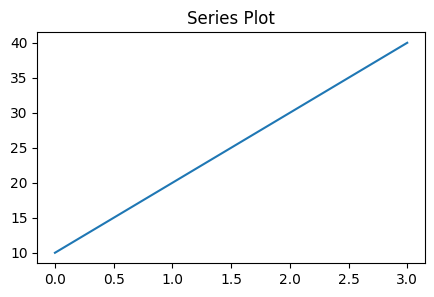

In [33]:
import matplotlib.pyplot as plt

s1.plot(kind='line', figsize=(5,3))
plt.title("Series Plot")
plt.show()


## 🔥 Advanced Series Concepts
- Reindexing
- Value counts
- Cumulative operations
- Window functions
- Handling categorical data


In [34]:
# Reindexing
s7 = s1.reindex([0,1,2,3,4,5])
s7


0    10.0
1    20.0
2    30.0
3    40.0
4     NaN
5     NaN
dtype: float64

In [35]:
# Value counts
pd.Series([1,2,2,3,3,3]).value_counts()


3    3
2    2
1    1
Name: count, dtype: int64

In [36]:
# Cumulative operations
s1.cumsum(), s1.cumprod()


(0     10
 1     30
 2     60
 3    100
 dtype: int64,
 0        10
 1       200
 2      6000
 3    240000
 dtype: int64)

In [37]:
# Rolling window (moving average)
s1.rolling(2).mean()


0     NaN
1    15.0
2    25.0
3    35.0
dtype: float64

In [38]:
# Convert to categorical
pd.Series(["low","medium","high"]).astype("category")


0       low
1    medium
2      high
dtype: category
Categories (3, object): ['high', 'low', 'medium']

# 📚 Pandas DataFrame — Complete Tutorial (Beginner → Advanced)

In this notebook, you will learn **everything** about Pandas DataFrames:

### ✅ Basic Concepts
- What is a DataFrame?
- Creating DataFrames (all methods)
- Basic info & summary

### ✅ Indexing & Selecting
- Column selection
- Row selection using `loc`, `iloc`
- Boolean indexing
- Filtering

### ✅ Data Cleaning & Preprocessing
- Handling missing values
- Handling duplicates
- Renaming columns
- Changing data types
- Replacing values
- String operations
- Binning, clipping, cutting

### ✅ Data Manipulation
- Add / remove columns & rows
- Sorting
- Merging, joining, concatenating
- GroupBy (aggregation, transform, filter)
- Pivot tables
- Crosstab
- Apply, map, applymap

### ✅ Statistical Operations
- Describe
- Correlation
- Covariance
- Cumulative operations

### ✅ Time Series Operations
- Date parsing
- Resampling
- Shifting
- Rolling window

### ✅ Import / Export
- CSV, Excel, JSON, SQL

### ✅ Visualization
- Line, bar, pie plots
- Histograms
- Boxplots

Let's start!


In [40]:
# From a dictionary of lists
df1 = pd.DataFrame({
    "Name": ["A", "B", "C"],
    "Age": [23, 25, 21],
    "Marks": [85, 92, 78]
})
df1


,Name,Age,Marks
0,A,23,85
1,B,25,92
2,C,21,78


In [41]:
# From dictionary of Series
df2 = pd.DataFrame({
    "A": pd.Series([1, 2, 3]),
    "B": pd.Series([4, 5, 6])
})
df2


,A,B
0,1,4
1,2,5
2,3,6


In [42]:
# From a list of dictionaries
df3 = pd.DataFrame([
    {"Name": "A", "Age": 20},
    {"Name": "B", "Age": 25},
    {"Name": "C", "Age": 30}
])
df3


,Name,Age
0,A,20
1,B,25
2,C,30


In [43]:
# Using numpy array
df4 = pd.DataFrame(np.random.randn(4,3),
                   columns=["C1","C2","C3"])
df4


,C1,C2,C3
0,0.569477,-1.149380,-1.285779
1,-0.698125,-0.016265,0.544085
2,-1.621263,-1.198555,0.910771
3,0.027207,0.368721,-0.352407


In [44]:
# From list of lists
df5 = pd.DataFrame([
    [10,20],
    [30,40]
], columns=["X","Y"])
df5


,X,Y
0,10,20
1,30,40


## Basic DataFrame Information


In [45]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Marks   3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [46]:
df1.describe()


,Age,Marks
count,3.0,3.0
mean,23.0,85.0
std,2.0,7.0
min,21.0,78.0
25%,22.0,81.5
50%,23.0,85.0
75%,24.0,88.5
max,25.0,92.0


In [47]:
df1.head(2)


,Name,Age,Marks
0,A,23,85
1,B,25,92


In [48]:
df1.tail(2)


,Name,Age,Marks
1,B,25,92
2,C,21,78


## Selecting Data


In [49]:
# Select one column
df1["Name"]


0    A
1    B
2    C
Name: Name, dtype: object

In [50]:
# Select multiple columns
df1[["Name", "Marks"]]


,Name,Marks
0,A,85
1,B,92
2,C,78


In [51]:
# Select rows with iloc (index number)
df1.iloc[0:2]


,Name,Age,Marks
0,A,23,85
1,B,25,92


In [52]:
# Select rows with loc (label-based)
df1.loc[0:1, ["Name", "Age"]]


,Name,Age
0,A,23
1,B,25


In [53]:
# Boolean indexing
df1[df1["Marks"] > 80]


,Name,Age,Marks
0,A,23,85
1,B,25,92


## Adding & Removing Columns and Rows


In [54]:
# Add new column
df1["Grade"] = ["A", "A+", "B"]
df1


,Name,Age,Marks,Grade
0,A,23,85,A
1,B,25,92,A+
2,C,21,78,B


In [55]:
# Add column based on calculation
df1["Age+5"] = df1["Age"] + 5
df1


,Name,Age,Marks,Grade,Age+5
0,A,23,85,A,28
1,B,25,92,A+,30
2,C,21,78,B,26


In [56]:
# Remove column
df1.drop("Age+5", axis=1)


,Name,Age,Marks,Grade
0,A,23,85,A
1,B,25,92,A+
2,C,21,78,B


In [57]:
# Remove multiple columns
df1.drop(["Age","Grade"], axis=1)


,Name,Marks,Age+5
0,A,85,28
1,B,92,30
2,C,78,26


## Handling Missing Values


In [58]:
df_missing = pd.DataFrame({
    "A":[1, np.nan, 3],
    "B":[4,5,np.nan],
    "C":[np.nan,8,9]
})
df_missing


,A,B,C
0,1.0,4.0,NaN
1,NaN,5.0,8.0
2,3.0,NaN,9.0


In [59]:
df_missing.isna()


,A,B,C
0,False,False,True
1,True,False,False
2,False,True,False


In [60]:
df_missing.fillna(0)


,A,B,C
0,1.0,4.0,0.0
1,0.0,5.0,8.0
2,3.0,0.0,9.0


In [61]:
df_missing.dropna()


,A,B,C


In [62]:
df_missing.ffill()


,A,B,C
0,1.0,4.0,NaN
1,1.0,5.0,8.0
2,3.0,5.0,9.0


## Handling Duplicates


In [63]:
df_dup = pd.DataFrame({"A":[1,1,2,3],"B":[4,4,5,6]})
df_dup.duplicated()


0    False
1     True
2    False
3    False
dtype: bool

In [64]:
df_dup.drop_duplicates()


,A,B
0,1,4
2,2,5
3,3,6


## Rename, Replace, Type Conversion


In [65]:
df1.rename(columns={"Marks":"Score"})


,Name,Age,Score,Grade,Age+5
0,A,23,85,A,28
1,B,25,92,A+,30
2,C,21,78,B,26


In [66]:
df1["Age"].astype(float)


0    23.0
1    25.0
2    21.0
Name: Age, dtype: float64

In [67]:
df1.replace({"A":"AAA"})


,Name,Age,Marks,Grade,Age+5
0,AAA,23,85,AAA,28
1,B,25,92,A+,30
2,C,21,78,B,26


## String Operations (Very Useful)


In [68]:
df_str = pd.DataFrame({"Name":["John","Alice","Bob"]})
df_str["Name"].str.upper()


0     JOHN
1    ALICE
2      BOB
Name: Name, dtype: object

## Filtering & Query


In [69]:
df1.query("Marks > 80")


,Name,Age,Marks,Grade,Age+5
0,A,23,85,A,28
1,B,25,92,A+,30


## Sorting


In [70]:
df1.sort_values("Marks")


,Name,Age,Marks,Grade,Age+5
2,C,21,78,B,26
0,A,23,85,A,28
1,B,25,92,A+,30


# GroupBy (Aggregation, Transform, Filter)


In [71]:
df_group = pd.DataFrame({
    "Dept":["IT","IT","HR","HR"],
    "Salary":[100,120,90,95]
})
df_group.groupby("Dept").mean()


,Salary
Dept,
HR,92.5
IT,110.0


In [72]:
df_group.groupby("Dept").agg(["mean","max","min"])


Salary          
       mean  max  min
Dept                 
HR     92.5   95   90
IT    110.0  120  100

## Merge, Join, Concat (Super Useful)


In [73]:
df_a = pd.DataFrame({"ID":[1,2,3], "Name":["A","B","C"]})
df_b = pd.DataFrame({"ID":[1,2,4], "Score":[90,80,70]})

pd.merge(df_a, df_b, on="ID", how="inner")


,ID,Name,Score
0,1,A,90
1,2,B,80


In [74]:
pd.concat([df_a, df_b], axis=0)


,ID,Name,Score
0,1,A,NaN
1,2,B,NaN
2,3,C,NaN
0,1,NaN,90.0
1,2,NaN,80.0
2,4,NaN,70.0


## Pivot Table & Crosstab


In [75]:
df_pivot = pd.DataFrame({
    "Dept":["IT","IT","HR","HR"],
    "Gender":["M","F","M","F"],
    "Salary":[100,120,90,95]
})
pd.pivot_table(df_pivot, values="Salary", index="Dept", columns="Gender")


Gender,F,M
Dept,,
HR,95.0,90.0
IT,120.0,100.0


In [76]:
pd.crosstab(df_pivot["Dept"], df_pivot["Gender"])


Gender,F,M
Dept,,
HR,1,1
IT,1,1


## apply(), map(), applymap()


In [77]:
df1.apply(np.max)


Name      C
Age      25
Marks    92
Grade     B
Age+5    30
dtype: object

In [78]:
df1["Marks"].map(lambda x: x+10)


0     95
1    102
2     88
Name: Marks, dtype: int64

In [79]:
df4.applymap(lambda x: round(x,2))


C:\Users\prito\AppData\Local\Temp\ipykernel_11860\1141226814.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df4.applymap(lambda x: round(x,2))


,C1,C2,C3
0,0.57,-1.15,-1.29
1,-0.70,-0.02,0.54
2,-1.62,-1.20,0.91
3,0.03,0.37,-0.35


## Time Series (Important for ML & Finance)


In [80]:
dates = pd.date_range("2023-01-01", periods=5, freq="D")
df_time = pd.DataFrame({"Value":[10,20,30,40,50]}, index=dates)
df_time


,Value
2023-01-01,10
2023-01-02,20
2023-01-03,30
2023-01-04,40
2023-01-05,50


In [81]:
df_time.resample("2D").mean()


,Value
2023-01-01,15.0
2023-01-03,35.0
2023-01-05,50.0


In [82]:
df_time.shift(1)


,Value
2023-01-01,NaN
2023-01-02,10.0
2023-01-03,20.0
2023-01-04,30.0
2023-01-05,40.0


In [83]:
df_time.rolling(2).mean()


,Value
2023-01-01,NaN
2023-01-02,15.0
2023-01-03,25.0
2023-01-04,35.0
2023-01-05,45.0


## Import / Export (CSV, Excel, JSON)


In [84]:
# df.to_csv("file.csv", index=False)
# pd.read_csv("file.csv")


## Visualization


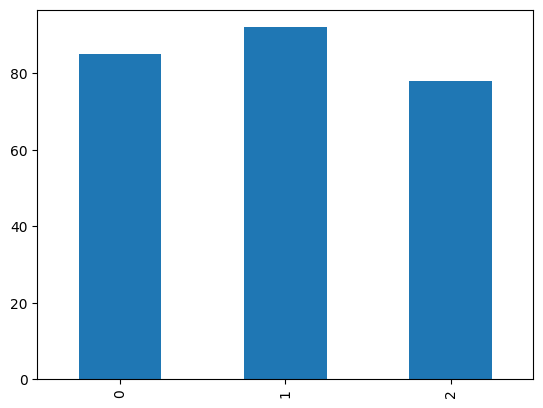

In [85]:
df1["Marks"].plot(kind="bar")
plt.show()


In [86]:
# Create DataFrame from dict
df = pd.DataFrame({
    "id": [1,2,3],
    "name": ["alice","bob","carol"],
    "age": [25, 30, 27],
    "income": [50000, 60000, 55000]
})
df

,id,name,age,income
0,1,alice,25,50000
1,2,bob,30,60000
2,3,carol,27,55000


## Inspecting DataFrames
- `df.head()`, `df.tail()`, `df.shape`, `df.info()`, `df.describe()`
- `df.columns`, `df.dtypes`, `df.memory_usage()`


In [6]:
df.head(), df.shape, df.info(), df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3 non-null      int64 
 1   name    3 non-null      object
 2   age     3 non-null      int64 
 3   income  3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


(   id   name  age  income
 0   1  alice   25   50000
 1   2    bob   30   60000
 2   3  carol   27   55000,
 (3, 4),
 None,
          id   name        age   income
 count   3.0      3   3.000000      3.0
 unique  NaN      3        NaN      NaN
 top     NaN  alice        NaN      NaN
 freq    NaN      1        NaN      NaN
 mean    2.0    NaN  27.333333  55000.0
 std     1.0    NaN   2.516611   5000.0
 min     1.0    NaN  25.000000  50000.0
 25%     1.5    NaN  26.000000  52500.0
 50%     2.0    NaN  27.000000  55000.0
 75%     2.5    NaN  28.500000  57500.0
 max     3.0    NaN  30.000000  60000.0)

## I/O (read/write)
- CSV: `read_csv`, `to_csv`
- Excel: `read_excel`, `to_excel` (requires openpyxl/xlrd)
- JSON: `read_json`, `to_json`
- Parquet: `read_parquet`, `to_parquet` (fast, columnar)
- SQL: `read_sql`, `to_sql` with SQLAlchemy


In [7]:
# Save & load CSV
df.to_csv("sample.csv", index=False)
df2 = pd.read_csv("sample.csv")
# Parquet (for speed/size)
# df.to_parquet("sample.parquet")
df2


,id,name,age,income
0,1,alice,25,50000
1,2,bob,30,60000
2,3,carol,27,55000


## Indexing & selection
- Column selection: `df["col"]`, `df.col`
- Row selection: `df.loc[row_label]`, `df.iloc[row_pos]`
- label vs positional → `loc` (labels) and `iloc` (positions)
- `at` and `iat` for fast scalar access


In [8]:
# More data
df = pd.DataFrame({
    "A": range(5),
    "B": list("abcde"),
    "C": np.linspace(0,1,5)
})
df.index = pd.Index([10,11,12,13,14], name="idx")
display(df)
# loc, iloc
print(df.loc[10, "B"])
print(df.iloc[0, 1])
# slice rows
display(df.loc[10:12])


,A,B,C
idx,,,
10,0,a,0.00
11,1,b,0.25
12,2,c,0.50
13,3,d,0.75
14,4,e,1.00


a
a


,A,B,C
idx,,,
10,0,a,0.00
11,1,b,0.25
12,2,c,0.50


## Boolean indexing
Use boolean masks: `df[df['A'] > 2]`. Combine conditions with `&` and `|` (parentheses required).


In [9]:
df[(df["A"] >= 2) & (df["C"] > 0.4)]


,A,B,C
idx,,,
12,2,c,0.50
13,3,d,0.75
14,4,e,1.00


## Creating / modifying columns
- `df["new"] = ...`, `df.assign(...)`
- Use `np.where` for conditional column creation
- Avoid chained assignment — prefer `.loc`


In [10]:
df["A2"] = df["A"] * 10
df = df.assign(D=df["C"] + df["A"])
df["flag"] = np.where(df["A"]%2==0, "even", "odd")
df


,A,B,C,A2,D,flag
idx,,,,,,
10,0,a,0.00,0,0.00,even
11,1,b,0.25,10,1.25,odd
12,2,c,0.50,20,2.50,even
13,3,d,0.75,30,3.75,odd
14,4,e,1.00,40,5.00,even


## Missing Data (NaN)
- `df.isna()`, `df.isnull()`, `df.dropna()`, `df.fillna()`
- `interpolate`, forward-fill (`ffill`), back-fill (`bfill`)
- For ML, decide strategy: drop, fill with median/mean, model-based imputation


In [11]:
d = pd.DataFrame({"x":[1, np.nan, 3, np.nan], "y":[np.nan, "b", "c", "d"]})
d
d.isna()
d.fillna({"x": d["x"].median(), "y": "missing"}, inplace=True)
d


,x,y
0,1.0,missing
1,2.0,b
2,3.0,c
3,2.0,d


## dtypes & conversions
- `df.dtypes`
- Convert: `df.astype({"col": "int32"})`, `pd.to_datetime`, `pd.to_numeric`, `astype("category")`
- Use categories for repeated strings to save memory and speed up groupby


In [12]:
df2 = pd.DataFrame({"id": list(range(1000)), "city": np.random.choice(["Dhaka","NY","LA"], size=1000)})
print(df2.memory_usage(deep=True).sum())
df2["city"] = df2["city"].astype("category")
print("after:", df2.memory_usage(deep=True).sum())


68217
after: 9416


## GroupBy — split-apply-combine
`df.groupby([...]).agg({...})` — common aggregations: sum, mean, count, nunique, custom functions.


In [13]:
sales = pd.DataFrame({
    "store": ["A","A","B","B","B"],
    "date": pd.to_datetime(["2021-01-01","2021-01-02","2021-01-01","2021-01-02","2021-01-03"]),
    "sales": [100, 150, 200, 130, 170]
})
sales.groupby("store").agg(total_sales=("sales","sum"),
                            mean_sales=("sales","mean"),
                            count=("sales","size"))


,total_sales,mean_sales,count
store,,,
A,250,125.000000,2
B,500,166.666667,3


## Pivot & pivot_table, crosstab
- `pivot` (wide reshape), `pivot_table` supports aggregation and margins
- `pd.crosstab` for contingency tables


In [14]:
sales.pivot_table(index="store", columns=sales["date"].dt.day, values="sales", aggfunc="sum", fill_value=0)


date,1,2,3
store,,,
A,100,150,0
B,200,130,170


## Reshaping
- `pd.melt` (wide → long)
- `stack`/`unstack` for MultiIndex pivoting


In [15]:
wide = pd.DataFrame({"id":[1,2],"math":[90,80],"eng":[85,88]})
long = pd.melt(wide, id_vars=["id"], var_name="subject", value_name="score")
long


,id,subject,score
0,1,math,90
1,2,math,80
2,1,eng,85
3,2,eng,88


## Combining tables
- `pd.concat([df1,df2])` for stacking
- `df.merge(df2, on=..., how='left'/'inner'/'right'/'outer')` like SQL joins
- `df.join(other)` uses index


In [16]:
left = pd.DataFrame({"id":[1,2,3], "x":[10,20,30]})
right = pd.DataFrame({"id":[2,3,4], "y":[200,300,400]})
left.merge(right, on="id", how="outer", indicator=True)


,id,x,y,_merge
0,1,10.0,NaN,left_only
1,2,20.0,200.0,both
2,3,30.0,300.0,both
3,4,NaN,400.0,right_only


## Datetime & Time Series
- `pd.to_datetime`, `dt` accessor, resample, asfreq
- Timeseries aggregation: `.resample('M').sum()`
- Timezones: `tz_localize`, `tz_convert`


In [17]:
ts = pd.date_range("2021-01-01", periods=12, freq="D")
df_ts = pd.DataFrame({"date": ts, "val": np.random.randn(len(ts))})
df_ts.set_index("date").resample("W").mean()
# dt accessor
df_ts["month"] = df_ts["date"].dt.month
df_ts.head()


,date,val,month
0,2021-01-01,-0.475978,1
1,2021-01-02,-0.817101,1
2,2021-01-03,0.484950,1
3,2021-01-04,0.483432,1
4,2021-01-05,0.273210,1


## Rolling / Window functions
- `df.rolling(window=3).mean()`, `expanding()`, `ewm()` (exponentially weighted)
Useful for smoothing, moving averages, lag features.


In [18]:
s = pd.Series(np.arange(10) + np.random.randn(10))
s.rolling(window=3).mean()


0         NaN
1         NaN
2    0.710907
3    2.072108
4    3.697020
5    4.843643
6    6.059850
7    7.039202
8    7.658267
9    8.018203
dtype: float64

## Apply, map, vectorize
- Prefer vectorized operations or built-in methods (fast)
- `df.apply` and `df.applymap` are slower but useful for custom logic
- `pd.Series.map` for elementwise mapping


In [19]:
df = pd.DataFrame({"a":[1,2,3], "b":[10,20,30]})
# vectorized
df["sum"] = df["a"] + df["b"]
# apply (row-wise)
df["r_sum"] = df.apply(lambda r: r["a"] + r["b"], axis=1)
df


,a,b,sum,r_sum
0,1,10,11,11
1,2,20,22,22
2,3,30,33,33


## String handling
Use `.str` accessor: `df['col'].str.lower().str.contains('abc')`, `extract`, `replace` with regex.


In [20]:
names = pd.Series(["Alice Smith","bob jones","Caroline"])
names.str.lower().str.split().str[0]
names.str.contains("bob", case=False)


0    False
1     True
2    False
dtype: bool

## Categorical dtype
- Convert with `astype('category')`
- Good for repeated strings -> less memory & faster groupby
- You can set ordered categories for ordinal data


In [21]:
df = pd.DataFrame({"grade": ["A","B","A","C","B"]})
df["grade_cat"] = pd.Categorical(df["grade"], categories=["C","B","A"], ordered=True)
df["grade_cat"].cat.codes


0    2
1    1
2    2
3    0
4    1
dtype: int8

## MultiIndex (hierarchical index)
- Useful for pivoted tables, groupby results with multiple keys
- `set_index([...])`, `swaplevel`, `sort_index`, `xs` (cross-section)


In [22]:
mi = sales.set_index(["store","date"])
mi.head()
# access cross-section
mi.xs("A", level="store")


,sales
date,
2021-01-01,100
2021-01-02,150


## Performance & best practices
- Use vectorized ops; avoid Python loops.
- Use appropriate dtypes (`category`, numeric types).
- Use `query()` for readable boolean filters.
- Use `eval()` for large expression evaluation.
- For very large data, process in `chunksize` or use `dask.dataframe`.
- Use `numba` or C-extensions only when needed.


In [23]:
# Process large CSV in chunks (example: compute sum of column)
# for chunk in pd.read_csv("big.csv", chunksize=100_000):
#     process(chunk)
# Example: sum of column with chunks:
# total = 0
# for ch in pd.read_csv("big.csv", usecols=['amount'], chunksize=200000):
#     total += ch['amount'].sum()
